# Text Mining and Language Analytics


## 1. Loading and preparing data.

### 1.1. Loading data

In [1]:
import pandas as pd
df = pd.read_csv("fake_news_dataset.csv")
df.head(5)


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [2]:
num_rows, num_cols = df.shape

print(f"The dataframe has {num_rows} rows and {num_cols} columns",end='\n\n')
print(f"Number of reliable news: \t{sum(df['label'] == 0)},{(sum(df['label'] == 0))/num_rows * 100:.2f}%",end='\n\n')
print(f"Number of unreliable news:\t {sum(df['label'] == 1)},{(sum(df['label'] == 1))/num_rows * 100:.2f}%",end='\n\n')
print(df.isna().sum())

The dataframe has 20800 rows and 5 columns

Number of reliable news: 	10387,49.94%

Number of unreliable news:	 10413,50.06%

id           0
title      558
author    1957
text        39
label        0
dtype: int64


In [3]:
df['alltext'] = df['title'] + '. ' + df['text'] # Concatenate title and text into column alltext
df = df.reindex(columns=['alltext','label']) # Transform the dataset to contain only the label and alltext columns
df.head(5) # Show first 5 rows in dataset

,alltext,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",0
2,Why the Truth Might Get You Fired. Why the Tru...,1
3,15 Civilians Killed In Single US Airstrike Hav...,1
4,Iranian woman jailed for fictional unpublished...,1


In [4]:
df.drop(df[df.alltext.str.len() < 50].index, inplace=True) # Remove texts that are less than 50 characters long 
print(df.isna().sum(), end="\n\n")
df.dropna(inplace=True)
print(df.isna().sum())

alltext    597
label        0
dtype: int64

alltext    0
label      0
dtype: int64


In [5]:
alltexts = df['alltext'].tolist()
labels = df['label'].tolist() # The reliability label of the article (0-reliable, 1-unreliable)

print('Total news:', len(alltexts))
print('Total labels:', len(labels))

Total news: 20185
Total labels: 20185


### 1.2. Word tokenisation


In [6]:
from nltk import word_tokenize

alltexts_tokenised = []
labels_final = []

print('Tokenising news...', end='')
for i in range(len(alltexts)):
    try:
        tokens = word_tokenize(alltexts[i].lower()) # Tokenise news
        alltexts_tokenised.append(tokens) # Add news tokens to list 
        labels_final.append(labels[i]) # Add label for news to labels list
    except:
        pass
print('[DONE]\n')

print('Total news:', len(alltexts_tokenised))
print('Total labels:', len(labels_final))

print(alltexts_tokenised[0]) # Print first news

# how to process words like "didn't" and "Mary's"?


Tokenising news...[DONE]

Total news: 20185
Total labels: 20185
['house', 'dem', 'aide', ':', 'we', 'didn', '’', 't', 'even', 'see', 'comey', '’', 's', 'letter', 'until', 'jason', 'chaffetz', 'tweeted', 'it', '.', 'house', 'dem', 'aide', ':', 'we', 'didn', '’', 't', 'even', 'see', 'comey', '’', 's', 'letter', 'until', 'jason', 'chaffetz', 'tweeted', 'it', 'by', 'darrell', 'lucus', 'on', 'october', '30', ',', '2016', 'subscribe', 'jason', 'chaffetz', 'on', 'the', 'stump', 'in', 'american', 'fork', ',', 'utah', '(', 'image', 'courtesy', 'michael', 'jolley', ',', 'available', 'under', 'a', 'creative', 'commons-by', 'license', ')', 'with', 'apologies', 'to', 'keith', 'olbermann', ',', 'there', 'is', 'no', 'doubt', 'who', 'the', 'worst', 'person', 'in', 'the', 'world', 'is', 'this', 'week–fbi', 'director', 'james', 'comey', '.', 'but', 'according', 'to', 'a', 'house', 'democratic', 'aide', ',', 'it', 'looks', 'like', 'we', 'also', 'know', 'who', 'the', 'second-worst', 'person', 'is', 'as', 

### 1.3. Pre-processing

In [7]:
from nltk.corpus import stopwords # Import the stop words lists from NLTK
import re # Import the re package

stopwords_english = stopwords.words('english') # Load the stop words list for English in variable

alltexts_processed = alltexts_tokenised

print('Preprocessing news...',end='')
for i in range(len(alltexts_tokenised)):
    new_tokens =[]
    for word in alltexts_tokenised[i]:
        word = word.replace('-','')
        word = word.replace('.','')
        regex_check = re.match('[a-z]+',word)
        if (regex_check != None):
            if (regex_check.group()==word):
                new_tokens.append(word)
    alltexts_processed[i] = new_tokens
    
print('[DONE]\n')


# the for loop cannot remove all the None object
new_alltexts_processed = []
new_labels_final = []

for i in range(len(alltexts_processed)):
    if (len(alltexts_processed[i]) != 0):
        new_alltexts_processed.append(alltexts_processed[i])
        new_labels_final.append(labels_final[i])

alltexts_processed = new_alltexts_processed
labels_final = new_labels_final

for i in range(len(alltexts_processed)): # check if any pre-processed news is empty
    if (len(alltexts_processed[i])==0):
        print('News',i, 'is empty!')
    
print(alltexts_processed[0]) # print first news

print('Total news:', len(alltexts_processed))
print('Total labels:', len(labels_final))

Preprocessing news...[DONE]

['house', 'dem', 'aide', 'we', 'didn', 't', 'even', 'see', 'comey', 's', 'letter', 'until', 'jason', 'chaffetz', 'tweeted', 'it', 'house', 'dem', 'aide', 'we', 'didn', 't', 'even', 'see', 'comey', 's', 'letter', 'until', 'jason', 'chaffetz', 'tweeted', 'it', 'by', 'darrell', 'lucus', 'on', 'october', 'subscribe', 'jason', 'chaffetz', 'on', 'the', 'stump', 'in', 'american', 'fork', 'utah', 'image', 'courtesy', 'michael', 'jolley', 'available', 'under', 'a', 'creative', 'commonsby', 'license', 'with', 'apologies', 'to', 'keith', 'olbermann', 'there', 'is', 'no', 'doubt', 'who', 'the', 'worst', 'person', 'in', 'the', 'world', 'is', 'this', 'director', 'james', 'comey', 'but', 'according', 'to', 'a', 'house', 'democratic', 'aide', 'it', 'looks', 'like', 'we', 'also', 'know', 'who', 'the', 'secondworst', 'person', 'is', 'as', 'well', 'it', 'turns', 'out', 'that', 'when', 'comey', 'sent', 'his', 'nowinfamous', 'letter', 'announcing', 'that', 'the', 'fbi', 'was', 

In [8]:
dataset = []
for i in range(len(alltexts_processed)):
    text = " ".join(alltexts_processed[i]) # Join words with an empty space between word
    dataset.append(text)

print(dataset[0])


house dem aide we didn t even see comey s letter until jason chaffetz tweeted it house dem aide we didn t even see comey s letter until jason chaffetz tweeted it by darrell lucus on october subscribe jason chaffetz on the stump in american fork utah image courtesy michael jolley available under a creative commonsby license with apologies to keith olbermann there is no doubt who the worst person in the world is this director james comey but according to a house democratic aide it looks like we also know who the secondworst person is as well it turns out that when comey sent his nowinfamous letter announcing that the fbi was looking into emails that may be related to hillary clinton s email server the ranking democrats on the relevant committees didn t hear about it from comey they found out via a tweet from one of the republican committee chairmen as we now know comey notified the republican chairmen and democratic ranking members of the house intelligence judiciary and oversight commit

In [9]:
df = pd.DataFrame({'alltext':alltexts_processed, 'label':labels_final})
df.to_csv('fakenews_processed.csv',index=False)

num_rows, num_cols = df.shape

print(f"The dataframe has {num_rows} rows and {num_cols} columns")
print(f"Number of reliable news: \t{sum(df['label'] == 0)},{(sum(df['label'] == 0))/num_rows * 100:.2f}%")
print(f"Number of unreliable news:\t {sum(df['label'] == 1)},{(sum(df['label'] == 1))/num_rows * 100:.2f}%")

The dataframe has 20142 rows and 2 columns
Number of reliable news: 	10387,51.57%
Number of unreliable news:	 9755,48.43%


## 2. Splitting of dataset into training and test sets 
- data for Naïve Bayes model and k-Nearest Neighbours models

In [10]:
from sklearn.model_selection import train_test_split

# Split the dataset to a test set with 30% of the news and a traning set with the rest 70% of the news
samples_train, samples_test, labels_train, labels_test = train_test_split(dataset, labels_final, test_size=0.3, random_state=17) # 

no_of_training_samples = len(samples_train)
no_of_test_samples = len(samples_test)
total_samples = no_of_training_samples + no_of_test_samples

print(f'Total samples:\t\t{total_samples:4d}')
print(f'Training samples:\t{no_of_training_samples:4d}, {(no_of_training_samples/total_samples * 100):.2f}%')
print(f'Test samples:\t\t{no_of_test_samples:4d}, {no_of_test_samples/total_samples * 100:.2f}%' )

Total samples:		20142
Training samples:	14099, 70.00%
Test samples:		6043, 30.00%


In [11]:
no_of_reliable_training = labels_train.count(0)
no_of_unreliable_training = labels_train.count(1)

no_of_reliable_test = labels_test.count(0)
no_of_unreliable_test = labels_test.count(1)

print(f"Number of reliable news in training samples:\t{no_of_reliable_training},{no_of_reliable_training/no_of_training_samples * 100:.2f}%")
print(f"Number of unreliable news in training samples:\t{no_of_unreliable_training},{no_of_unreliable_training/no_of_training_samples * 100:.2f}%")

print(f"Number of reliable news in test samples:\t{no_of_reliable_test},{no_of_reliable_test/no_of_test_samples * 100:.2f}%")
print(f"Number of unreliable news in test samples:\t{no_of_unreliable_test},{no_of_unreliable_test/no_of_test_samples * 100:.2f}%")


Number of reliable news in training samples:	7286,51.68%
Number of unreliable news in training samples:	6813,48.32%
Number of reliable news in test samples:	3101,51.32%
Number of unreliable news in test samples:	2942,48.68%


## 3. a Naïve Bayes model  
### 3.1. Text classification using Naive Bayes   

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Build the Naive Bayes model by setting a pipeline where the input is first converted to TF-IDF vectors and then a Multinomial Naive Bayes is used
model_bayes = make_pipeline(TfidfVectorizer(), MultinomialNB())

model_bayes.fit(samples_train, labels_train)
predicted_categories = model_bayes.predict(samples_test)

print(f'Predicted:{predicted_categories.tolist()[0:10]}')
print(f'Ground truth:{labels_test[0:10]}')

Predicted:[0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
Ground truth:[0, 1, 1, 0, 0, 0, 0, 0, 0, 0]


### 3.2. Computation and plotting of Naive Bayes’s classification performance

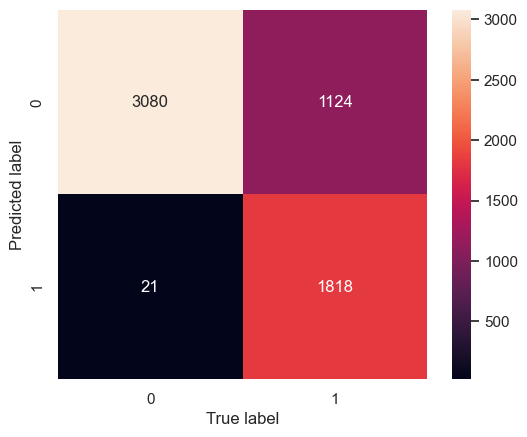

Accuracy:	0.810525
F1-score:	0.801884
Precision:	0.860608
Recall:		0.805587

Classification performance:
              precision    recall  f1-score   support

           0       0.73      0.99      0.84      3101
           1       0.99      0.62      0.76      2942

    accuracy                           0.81      6043
   macro avg       0.86      0.81      0.80      6043
weighted avg       0.86      0.81      0.80      6043



In [13]:
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, classification_report
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set() # use seaborn plotting style

# Plot the confusion matrix
mat = confusion_matrix(labels_test, predicted_categories)
sns.heatmap(mat.T, square = True, annot = True, fmt = 'd')
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.show()

# Compute and print classification performance metrics
print(f"Accuracy:\t{accuracy_score(labels_test, predicted_categories):f}")
print(f"F1-score:\t{f1_score(labels_test, predicted_categories, average='macro'):f}")
print(f"Precision:\t{precision_score(labels_test, predicted_categories,average='macro'):f}")
print(f"Recall:\t\t{recall_score(labels_test, predicted_categories,average='macro'):f}")

print(f'\nClassification performance:\n{classification_report(labels_test, predicted_categories)}')

### 3.3. Save trained model in a file for future use

In [14]:
import pickle
pkl_filename = "model_bayes_fakenews.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model_bayes, file)

## 4. two k-Nearest Neighbours models (k=3, k=7)
### 4.1 Text classification using 3NN

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Build the kNN model by setting a pipeline where the input is first converted to TF-IDF vectors and then a kNN classifier for k=3 is used
model_3nn = make_pipeline(TfidfVectorizer(), KNeighborsClassifier(n_neighbors=3))

model_3nn.fit(samples_train, labels_train) # Train the model on the training data
predicted_categories = model_3nn.predict(samples_test) # Predict the categories of the test data

print(f"Predicted:{predicted_categories.tolist()[0:10]}")  # Print the first 10 predictions
print(f"Ground truth:{labels_test[0:10]}") # Print the first 10 ground truth values

Predicted:[1, 1, 1, 1, 0, 0, 0, 1, 0, 0]
Ground truth:[0, 1, 1, 0, 0, 0, 0, 0, 0, 0]


### 4.2. Computation and plotting of 3NN’s classification performance

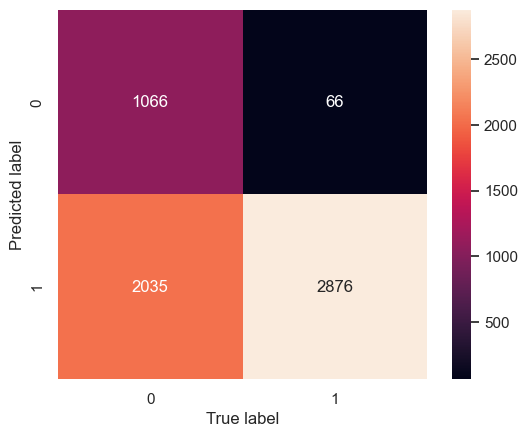

Accuracy:	0.652325
F1-score:	0.618060
Precision:	0.763660
Recall:		0.660663

Classification performance:
              precision    recall  f1-score   support

           0       0.94      0.34      0.50      3101
           1       0.59      0.98      0.73      2942

    accuracy                           0.65      6043
   macro avg       0.76      0.66      0.62      6043
weighted avg       0.77      0.65      0.62      6043



In [16]:
# Plot the confusion matrix

mat = confusion_matrix(labels_test, predicted_categories)
sns.heatmap(mat.T, square=True, annot=True, fmt='d')
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

# Compute and print classification performance metrics
print(f"Accuracy:\t{accuracy_score(labels_test, predicted_categories):f}")
print(f"F1-score:\t{f1_score(labels_test, predicted_categories, average='macro'):f}")
print(f"Precision:\t{precision_score(labels_test, predicted_categories,average='macro'):f}")
print(f"Recall:\t\t{recall_score(labels_test, predicted_categories,average='macro'):f}")

print(f'\nClassification performance:\n{classification_report(labels_test, predicted_categories)}')

### 4.3. Save trained model in a file for future use

In [17]:
import pickle
pkl_filename = "model_3nn_fakenews.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model_3nn, file)

### 4.4 Text classification using 7NN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Build the kNN model by setting a pipeline where the input is first converted to TF-IDF vectors and then a kNN classifier for k=3 is used
model_7nn = make_pipeline(TfidfVectorizer(), KNeighborsClassifier(n_neighbors=7))

model_7nn.fit(samples_train, labels_train) # Train the model on the training data
predicted_categories = model_7nn.predict(samples_test) # Predict the categories of the test data

print(f"Predicted:{predicted_categories.tolist()[0:10]}")  # Print the first 10 predictions
print(f"Ground truth:{labels_test[0:10]}") # Print the first 10 ground truth values

Predicted:[1, 1, 1, 0, 0, 0, 0, 1, 0, 0]
Ground truth:[0, 1, 1, 0, 0, 0, 0, 0, 0, 0]


### 4.5. Computation and plotting of 7NN’s classification performance

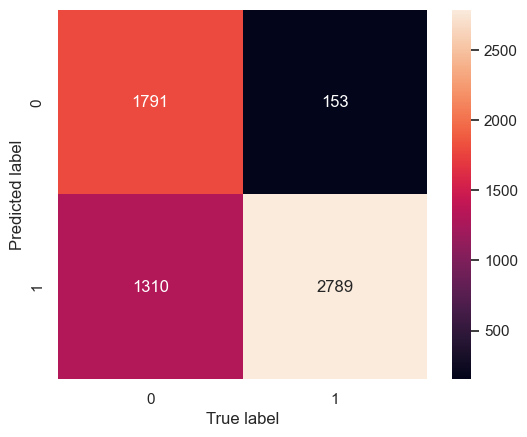

Accuracy:	0.757902
F1-score:	0.751113
Precision:	0.800853
Recall:		0.762775

Classification performance:
              precision    recall  f1-score   support

           0       0.92      0.58      0.71      3101
           1       0.68      0.95      0.79      2942

    accuracy                           0.76      6043
   macro avg       0.80      0.76      0.75      6043
weighted avg       0.80      0.76      0.75      6043



In [19]:
# Plot the confusion matrix

mat = confusion_matrix(labels_test, predicted_categories)
sns.heatmap(mat.T, square=True, annot=True, fmt='d')
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

# Compute and print classification performance metrics
print(f"Accuracy:\t{accuracy_score(labels_test, predicted_categories):f}")
print(f"F1-score:\t{f1_score(labels_test, predicted_categories, average='macro'):f}")
print(f"Precision:\t{precision_score(labels_test, predicted_categories,average='macro'):f}")
print(f"Recall:\t\t{recall_score(labels_test, predicted_categories,average='macro'):f}")

print(f'\nClassification performance:\n{classification_report(labels_test, predicted_categories)}')

### 4.6. Save trained model in a file for future use

In [20]:
pkl_filename = "model_7nn_fakenews.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model_7nn, file)

## 5. a Convolutional Neural Network (CNN) model
### 5.1. Create Pytorch dataset (Training data and Test data) for CNN model

In [21]:
def truncate_text_to_max_words(text,max_words): # Keep only the first max_words of each text 
    text = text.split(maxsplit=max_words) 
    text = ' '.join(text[:max_words]) 
    return text 

max_words = 300

training_data = pd.DataFrame({'alltext':samples_train, 'label': labels_train})
test_data = pd.DataFrame({'alltext':samples_test,'label':labels_test})

training_data['alltext'] = training_data['alltext'].apply(truncate_text_to_max_words,args=(max_words,))
test_data['alltext'] = test_data['alltext'].apply(truncate_text_to_max_words,args=(max_words,))

print("Training samples:",len(training_data['alltext'])) 
print("Test samples:",len(test_data['alltext']))

print(training_data['alltext'].iloc[0]) # Print first text as an example 
print(test_data['alltext'].iloc[0]) # Print first text as an example 

training_data.to_csv('training_data.csv',index=False)
test_data.to_csv('test_data.csv',index=False)

Training samples: 14099
Test samples: 6043
uk government hosts europe s largest jew hate event allegedly linked to terror a government building in westminster is hosting the biggest ever in europe event organised by a group allegedly linked to islamists and terror groups palestine expo is due to take place just yards away from parliament in the queen elizabeth ii centre which is owned by the government and operated by an agency of the department for communities and local government the building was reportedly one of those considered as a venue to host parliament itself when the palace of westminster is closed for renovations although presented as a introduction to palestinian history and culture the event will host islamist and speakers and has been described as a jew hate event by jewish groups be there get your earlybird tickets now offer ends may https freepalestine bds endoccupation freegaza pic twitter friends of al aqsa friendsofalaqsa may the event to be held on the and of july 

In [22]:
import torch
from torchtext.legacy import data
from torchtext.legacy.data import TabularDataset, Iterator
from nltk import word_tokenize

TEXT = data.Field(tokenize=word_tokenize, batch_first=True, include_lengths=True)  # Create text field for dataset
LABEL = data.LabelField(dtype=torch.float, batch_first = True) # Create label field for dataset

fields = [('text',TEXT),('label', LABEL)]

training_data, test_data = TabularDataset.splits(path='.', train='training_data.csv', test='test_data.csv', format='csv', fields = fields, skip_header=True)

print(vars(training_data.examples[0])) # Print first text as an example
print(vars(test_data.examples[0])) # Print first text as an example

/Users/mbp/opt/anaconda3/envs/pytorch/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'text': ['uk', 'government', 'hosts', 'europe', 's', 'largest', 'jew', 'hate', 'event', 'allegedly', 'linked', 'to', 'terror', 'a', 'government', 'building', 'in', 'westminster', 'is', 'hosting', 'the', 'biggest', 'ever', 'in', 'europe', 'event', 'organised', 'by', 'a', 'group', 'allegedly', 'linked', 'to', 'islamists', 'and', 'terror', 'groups', 'palestine', 'expo', 'is', 'due', 'to', 'take', 'place', 'just', 'yards', 'away', 'from', 'parliament', 'in', 'the', 'queen', 'elizabeth', 'ii', 'centre', 'which', 'is', 'owned', 'by', 'the', 'government', 'and', 'operated', 'by', 'an', 'agency', 'of', 'the', 'department', 'for', 'communities', 'and', 'local', 'government', 'the', 'building', 'was', 'reportedly', 'one', 'of', 'those', 'considered', 'as', 'a', 'venue', 'to', 'host', 'parliament', 'itself', 'when', 'the', 'palace', 'of', 'westminster', 'is', 'closed', 'for', 'renovations', 'although', 'presented', 'as', 'a', 'introduction', 'to', 'palestinian', 'history', 'and', 'culture', 'the

### 5.2. Create vocabulary using the training set

In [23]:
TEXT.build_vocab(training_data, min_freq=1)
LABEL.build_vocab(training_data)

print("Size of TEXT vocabulary:",len(TEXT.vocab)) # Number of unique tokens in vocabulary
print("Size of LABEL vocabulary:",len(LABEL.vocab),"\n") # Number of unique labels

print("Most common tokens:",TEXT.vocab.freqs.most_common(10),"\n") # Print the 10 most common tokens in the training set

print("Index of unknown word <unk>:",TEXT.vocab.stoi['<unk>'])
print("Index of padding word <pad>:",TEXT.vocab.stoi['<pad>'])

Size of TEXT vocabulary: 80800
Size of LABEL vocabulary: 2 

Most common tokens: [('the', 223887), ('to', 99555), ('of', 99369), ('a', 87289), ('and', 85749), ('in', 73621), ('that', 46972), ('s', 40680), ('on', 35998), ('is', 35495)] 

Index of unknown word <unk>: 0
Index of padding word <pad>: 1


### 5.3. Create iterators for the training and test data

In [24]:
import random 
RANDOM_SEED = 42

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #Set device to GPU if cuda available, else CPU
print("Device:",device)

torch.manual_seed(RANDOM_SEED) 
torch.backends.cudnn.deterministic = True
BATCH_SIZE = 32 #Set batch size for training

# Create data iterator for training and test sets
training_iterator, test_iterator = data.BucketIterator.splits( 
    (training_data, test_data), 
    batch_size = BATCH_SIZE, 
    sort_key = lambda x: len(x.text), 
    sort_within_batch=True, 
    device = device)


Device: cpu


### 5.4. Create CNN architecture
#### 5.4.1. Define network architecture

In [25]:
import torch.nn as nn

class TextCNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, dropout):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([
            nn.Conv2d(in_channels=1, out_channels=n_filters, kernel_size=(fs, embedding_dim))
            for fs in filter_sizes
        ])
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, text):
        embedded = self.embedding(text)
        embedded = embedded.unsqueeze(1)
        conved = [nn.functional.relu(conv(embedded)).squeeze(3) for conv in self.convs]
        pooled = [nn.functional.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        cat = self.dropout(torch.cat(pooled, dim=1))

        return self.fc(cat)

#### 5.4.2 Define hyperparameters and initialise model

In [26]:

BATCH_SIZE = 64
EMBEDDING_DIM = 20
N_FILTERS = 10
FILTER_SIZES = [3, 4, 5]
OUTPUT_DIM = 1
DROPOUT = 0.2

INPUT_DIM = len(TEXT.vocab)
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model_cnn = TextCNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT)

print("Model architecture:\n",model_cnn) # Print model's architecture

def count_parameters(model): # Computes the number of trainable parameters in the model
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print("\nThe model has",count_parameters(model_cnn),"trainable parameters")

Model architecture:
 TextCNN(
  (embedding): Embedding(80800, 20)
  (convs): ModuleList(
    (0): Conv2d(1, 10, kernel_size=(3, 20), stride=(1, 1))
    (1): Conv2d(1, 10, kernel_size=(4, 20), stride=(1, 1))
    (2): Conv2d(1, 10, kernel_size=(5, 20), stride=(1, 1))
  )
  (fc): Linear(in_features=30, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

The model has 1618461 trainable parameters


#### 5.4.3 Define the optimiser, loss function and performance metric

In [27]:
import torch.optim as optim

optimizer = optim.Adam(model_cnn.parameters())
criterion = nn.BCEWithLogitsLoss()

def binary_accuracy(predictions, y):
    rounded_preds = torch.round(torch.sigmoid(predictions))
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc

model_cnn = model_cnn.to(device)
criterion = criterion.to(device)


#### 5.4.4 Define training function


In [28]:
def train(model, iterator, optimizer, criterion):
    model.train()
    epoch_loss = 0
    epoch_acc = 0

    for batch in iterator:
        optimizer.zero_grad()
        predictions = model(batch.text[0].to(device)).squeeze(1)
        loss = criterion(predictions, batch.label)
        acc = binary_accuracy(predictions, batch.label)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)


#### 5.4.5 Define evaluation function

In [29]:
def evaluate(model, iterator, criterion):
    model.eval()
    epoch_loss = 0
    epoch_acc = 0

    with torch.no_grad():
        for batch in iterator:
            predictions = model(batch.text[0].to(device)).squeeze(1)
            loss = criterion(predictions, batch.label)
            acc = binary_accuracy(predictions, batch.label)
            epoch_loss += loss.item()
            epoch_acc += acc.item()

    return epoch_loss / len(iterator), epoch_acc / len(iterator)

### 5.5. Train CNN model

In [30]:
import time 
N_EPOCHS = 20

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    print("Epoch %3d:" % epoch,end='') 
    start = time.time() 

    train_loss, train_acc = train(model_cnn, training_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model_cnn, test_iterator, criterion)

    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        best_valid_acc = valid_acc 
        best_epoch = epoch 
        torch.save(model_cnn.state_dict(), 'model_cnn_fakenews.pt')

    print(f" Train loss: {train_loss:.3f} | Train accuracy: {train_acc*100:.2f}%",end="")
    print(f" Validation loss: {valid_loss:.3f} | Validation accuracy: {valid_acc*100:.2f}%", end='')
    print(" - %3.2f s" % (time.time()-start))

print(f"\nBest performance at epoch {best_epoch:d} | Loss: {best_valid_loss:.3f} | Accuracy: {best_valid_acc:3.4f}")


Epoch   0: Train loss: 0.632 | Train accuracy: 61.76% Validation loss: 0.439 | Validation accuracy: 82.97% - 7.32 s
Epoch   1: Train loss: 0.412 | Train accuracy: 80.83% Validation loss: 0.315 | Validation accuracy: 87.60% - 7.34 s
Epoch   2: Train loss: 0.311 | Train accuracy: 87.07% Validation loss: 0.190 | Validation accuracy: 93.64% - 7.34 s
Epoch   3: Train loss: 0.221 | Train accuracy: 91.53% Validation loss: 0.155 | Validation accuracy: 94.31% - 7.32 s
Epoch   4: Train loss: 0.184 | Train accuracy: 93.09% Validation loss: 0.136 | Validation accuracy: 94.90% - 7.28 s
Epoch   5: Train loss: 0.152 | Train accuracy: 94.30% Validation loss: 0.122 | Validation accuracy: 95.31% - 7.31 s
Epoch   6: Train loss: 0.131 | Train accuracy: 95.23% Validation loss: 0.117 | Validation accuracy: 95.69% - 7.32 s
Epoch   7: Train loss: 0.113 | Train accuracy: 96.06% Validation loss: 0.105 | Validation accuracy: 95.96% - 7.63 s
Epoch   8: Train loss: 0.101 | Train accuracy: 96.32% Validation loss: 0

### 5.6. Computation and plotting of CNN’s classification performance

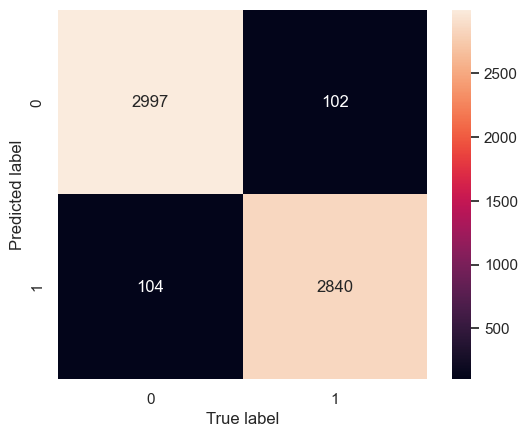

Accuracy:	0.965911
F1-score:	0.965888
Precision:	0.965880
Recall:		0.965896

Classification performance:
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      3101
         1.0       0.96      0.97      0.97      2942

    accuracy                           0.97      6043
   macro avg       0.97      0.97      0.97      6043
weighted avg       0.97      0.97      0.97      6043



In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

model_cnn.eval()
pred_labels = []
true_labels = []

with torch.no_grad():
    for batch in test_iterator:
        predictions = model_cnn(batch.text[0]).squeeze(1)
        pred = torch.round(torch.sigmoid(predictions))
        pred_labels += pred.tolist()
        true_labels += batch.label.tolist()

mat = confusion_matrix(true_labels, pred_labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d')
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

# Compute and print classification performance metrics
print(f"Accuracy:\t{accuracy_score(true_labels, pred_labels):f}")
print(f"F1-score:\t{f1_score(true_labels, pred_labels, average='macro'):f}")
print(f"Precision:\t{precision_score(true_labels, pred_labels,average='macro'):f}")
print(f"Recall:\t\t{recall_score(true_labels, pred_labels,average='macro'):f}")

print(f'\nClassification performance:\n{classification_report(true_labels, pred_labels)}')

## 6. a Long Short-Term Memory (LSTM) model
### 6.1 Create Pytorch dataset (Training data and Test data) for LSTM model

In [32]:
def truncate_text_to_max_words(text,max_words): # Keep only the first max_words of each text 
    text = text.split(maxsplit=max_words) 
    text = ' '.join(text[:max_words]) 
    return text 

max_words = 300

training_data = pd.DataFrame({'alltext':samples_train, 'label': labels_train})
test_data = pd.DataFrame({'alltext':samples_test,'label':labels_test})

training_data['alltext'] = training_data['alltext'].apply(truncate_text_to_max_words,args=(max_words,))
test_data['alltext'] = test_data['alltext'].apply(truncate_text_to_max_words,args=(max_words,))

print("Training samples:",len(training_data['alltext'])) 
print("Test samples:",len(test_data['alltext']))

print(training_data['alltext'].iloc[0]) # Print first text as an example 
print(test_data['alltext'].iloc[0]) # Print first text as an example 

training_data.to_csv('training_data.csv',index=False)
test_data.to_csv('test_data.csv',index=False)

Training samples: 14099
Test samples: 6043
uk government hosts europe s largest jew hate event allegedly linked to terror a government building in westminster is hosting the biggest ever in europe event organised by a group allegedly linked to islamists and terror groups palestine expo is due to take place just yards away from parliament in the queen elizabeth ii centre which is owned by the government and operated by an agency of the department for communities and local government the building was reportedly one of those considered as a venue to host parliament itself when the palace of westminster is closed for renovations although presented as a introduction to palestinian history and culture the event will host islamist and speakers and has been described as a jew hate event by jewish groups be there get your earlybird tickets now offer ends may https freepalestine bds endoccupation freegaza pic twitter friends of al aqsa friendsofalaqsa may the event to be held on the and of july 

In [33]:
import torch 
from torchtext.legacy import data #For handling text data
from nltk import word_tokenize # Import the word_tokenize function from NLTK

TEXT = data.Field(tokenize=word_tokenize, batch_first=True, include_lengths=True)  # Create text field for dataset
LABEL = data.LabelField(dtype=torch.float, batch_first = True) # Create label field for dataset

fields = [('text',TEXT),('label', LABEL)]

training_data=data.TabularDataset(path = 'training_data.csv',format = 'csv',fields = fields,skip_header = True) # Load dataset from csv file 
test_data=data.TabularDataset(path = 'test_data.csv',format = 'csv',fields = fields,skip_header = True) # Load dataset from csv file 

print(vars(training_data.examples[0])) # Print first text as an example
print(vars(test_data.examples[0])) # Print first text as an example

{'text': ['uk', 'government', 'hosts', 'europe', 's', 'largest', 'jew', 'hate', 'event', 'allegedly', 'linked', 'to', 'terror', 'a', 'government', 'building', 'in', 'westminster', 'is', 'hosting', 'the', 'biggest', 'ever', 'in', 'europe', 'event', 'organised', 'by', 'a', 'group', 'allegedly', 'linked', 'to', 'islamists', 'and', 'terror', 'groups', 'palestine', 'expo', 'is', 'due', 'to', 'take', 'place', 'just', 'yards', 'away', 'from', 'parliament', 'in', 'the', 'queen', 'elizabeth', 'ii', 'centre', 'which', 'is', 'owned', 'by', 'the', 'government', 'and', 'operated', 'by', 'an', 'agency', 'of', 'the', 'department', 'for', 'communities', 'and', 'local', 'government', 'the', 'building', 'was', 'reportedly', 'one', 'of', 'those', 'considered', 'as', 'a', 'venue', 'to', 'host', 'parliament', 'itself', 'when', 'the', 'palace', 'of', 'westminster', 'is', 'closed', 'for', 'renovations', 'although', 'presented', 'as', 'a', 'introduction', 'to', 'palestinian', 'history', 'and', 'culture', 'the

### 6.2. Create vocabulary using the training set

In [34]:
TEXT.build_vocab(training_data,min_freq=1) # Build vocabulary from training set. Consider words that occur at least 1 time
LABEL.build_vocab(training_data) # Build vocabulary for labels

print("Size of TEXT vocabulary:",len(TEXT.vocab)) # Number of unique tokens in vocabulary
print("Size of LABEL vocabulary:",len(LABEL.vocab),"\n") # Number of unique labels

print("Most common tokens:",TEXT.vocab.freqs.most_common(10),"\n") # Print the 10 most common tokens in the training set

# Print the index number for the unknown token (<unk>) and the token used for padding (<pad>)
print("Index of unknown word <unk>:",TEXT.vocab.stoi['<unk>'])
print("Index of padding word <pad>:",TEXT.vocab.stoi['<pad>'])

Size of TEXT vocabulary: 80800
Size of LABEL vocabulary: 2 

Most common tokens: [('the', 223887), ('to', 99555), ('of', 99369), ('a', 87289), ('and', 85749), ('in', 73621), ('that', 46972), ('s', 40680), ('on', 35998), ('is', 35495)] 

Index of unknown word <unk>: 0
Index of padding word <pad>: 1


### 6.3. Create iterators for the training and test data

In [35]:
import random 
RANDOM_SEED = 19

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') #Set device to GPU if cuda available, else CPU
print("Device:",device)

torch.manual_seed(RANDOM_SEED) 
BATCH_SIZE = 64 #Set batch size for training

# Create data iterator for training and test sets
training_iterator, test_iterator = data.BucketIterator.splits( 
    (training_data, test_data), 
    batch_size = BATCH_SIZE, 
    sort_key = lambda x: len(x.text), 
    sort_within_batch=True, 
    device = device)

Device: cpu


### 6.4. Create LSTM architecture
#### 6.4.1. Define network architecture

In [36]:
import torch.nn as nn

class FakeNewsNet(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, output_dim, n_layers, bidirectional, dropout):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim) # Word embedding layer
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, num_layers=n_layers, bidirectional=bidirectional, dropout=dropout, batch_first=True) # LSTM layer
        self.fc1 = nn.Linear(hidden_dim * 2, output_dim) # Dense layer
        self.act = nn.Sigmoid()
    
    def forward(self, text, text_lengths):
        embedded = self.embedding(text) # Create embedding of the input text
        # Handle padding to ignore padding during training of the RNN
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, text_lengths,batch_first=True) 
        packed_output, (hidden, cell) = self.lstm(packed_embedded)

        hidden = torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1) # Concatenate the final forward and backward hidden state
        dense_outputs=self.fc1(hidden)
        outputs=self.act(dense_outputs) # Apply sigmoid activation function to output

        return outputs


#### 6.4.2 Define hyperparameters and initialise model

In [37]:
# Set hyperparameters for network architecture and training
vocabulary_size = len(TEXT.vocab)
embedding_dimensions = 20 # Set to 20 for faster computations. Larger numbers typically required. I tried 50, it took too long much time.
LSTM_no_of_hidden_nodes = 16 # The number of features in the hidden state h of the LSTM
LSTM_no_of_recurrent_layers = 2 # Number of recurrent layers for RNN (to be stacked)
LSTM_bidirection = True # Set to True for bidirectional LSTM (BiLSTM)
LSTM_dropout = 0.2 # If not 0, introduces a dropout layer in the output of the LSTM
output_size = 1 # Size of output layer

# Initialise the model
model_lstm = FakeNewsNet(vocabulary_size, embedding_dimensions, LSTM_no_of_hidden_nodes, output_size, LSTM_no_of_recurrent_layers, bidirectional = LSTM_bidirection,dropout = LSTM_dropout)

print("Model architecture:\n",model_lstm) # Print model's architecture

def count_parameters(model): # Computes the number of trainable parameters in the model
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print("\nThe model has",count_parameters(model_lstm),"trainable parameters")

Model architecture:
 FakeNewsNet(
  (embedding): Embedding(80800, 20)
  (lstm): LSTM(20, 16, num_layers=2, batch_first=True, dropout=0.2, bidirectional=True)
  (fc1): Linear(in_features=32, out_features=1, bias=True)
  (act): Sigmoid()
)

The model has 1627297 trainable parameters


#### 6.4.3 Define the optimiser, loss function and performance metric

In [38]:
import torch.optim as optim

optimizer = optim.Adam(model_lstm.parameters()) # Use the Adam optimiser
criterion = nn.BCELoss() # Use Binary Cross Entropy between the target and the output as the loss function

# Define binary accuracy metric
def binary_accuracy(preds, y):
    rounded_preds = torch.round(preds) # Round predictions to the closest integer
    correct = (rounded_preds == y).float()
    acc = correct.sum() / len(correct)
    return acc

# Sent model to device
model_lstm = model_lstm.to(device) 
criterion = criterion.to(device)

#### 6.4.4 Define training function


In [39]:
def train(model, iterator, optimizer, criterion): 
    epoch_loss = 0 
    epoch_acc = 0 
    model.train() # Set the model in training phase
    for batch in iterator:
        optimizer.zero_grad() # Reset the gradients after every batch 
        text, text_lengths = batch.text # Retrieve text and number of words 
        predictions = model(text, text_lengths).squeeze() # Convert to 1D tensor 
        loss = criterion(predictions, batch.label) # Compute the loss 
        acc = binary_accuracy(predictions, batch.label) # Compute the binary accuracy 
        loss.backward() # Backpropagation 
        optimizer.step() # Update the weights 
        # Update epoch's loss and accuracy 
        epoch_loss += loss.item() 
        epoch_acc += acc.item() 
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

#### 6.4.5 Define evaluation function

In [40]:
def evaluate(model, iterator, criterion): 
    epoch_loss = 0
    epoch_acc = 0 
    model.eval() # Set the model in evaluation phase 
    with torch.no_grad(): #Deactivates autograd 
        for batch in iterator: 
            text, text_lengths = batch.text # Retrieve text and number of words 
            predictions = model(text, text_lengths).squeeze() # Convert to 1d tensor 
            loss = criterion(predictions, batch.label) # Compute loss and accuracy 
            acc = binary_accuracy(predictions, batch.label) 
            # Update epoch's loss and accuracy 
            epoch_loss += loss.item() 
            epoch_acc += acc.item() 
        return epoch_loss / len(iterator), epoch_acc / len(iterator)

### 6.5. Train LSTM model

In [41]:
import time 
N_EPOCHS = 10 # I tried 25, but it took hours and got little.
best_valid_loss = float('inf') 
best_valid_acc = float('inf') 
best_epoch = 0

for epoch in range(N_EPOCHS): 
    print("Epoch %3d:" % epoch,end='') 
    start = time.time() 
    #train the model 
    train_loss, train_acc = train(model_lstm, training_iterator, optimizer, criterion) 
    #evaluate the model 
    valid_loss, valid_acc = evaluate(model_lstm, test_iterator, criterion) 
    #save the best model 
    if valid_loss < best_valid_loss: 
        best_valid_loss = valid_loss 
        best_valid_acc = valid_acc 
        best_epoch = epoch 
        torch.save(model_lstm.state_dict(), 'model_lstm_fakenews.pt') # Save weights 
    print(" Train loss: %.3f | Train acuracy: %3.4f " % (train_loss,train_acc),end='') 
    print("| Validation loss: %.3f | Validation acuracy: %3.4f" % (valid_loss,valid_acc),end='') 
    print(" - %3.2f s" % (time.time()-start))

print("\nBest performance at epoch %d | Loss: %.3f | Accuracy: %3.4f" % (best_epoch,best_valid_loss,best_valid_acc))

Epoch   0: Train loss: 0.682 | Train acuracy: 0.5484 | Validation loss: 0.580 | Validation acuracy: 0.7501 - 175.84 s
Epoch   1: Train loss: 0.342 | Train acuracy: 0.8638 | Validation loss: 0.262 | Validation acuracy: 0.9004 - 178.06 s
Epoch   2: Train loss: 0.246 | Train acuracy: 0.9157 | Validation loss: 0.216 | Validation acuracy: 0.9212 - 177.76 s
Epoch   3: Train loss: 0.154 | Train acuracy: 0.9468 | Validation loss: 0.187 | Validation acuracy: 0.9302 - 171.66 s
Epoch   4: Train loss: 0.114 | Train acuracy: 0.9593 | Validation loss: 0.174 | Validation acuracy: 0.9372 - 169.59 s
Epoch   5: Train loss: 0.085 | Train acuracy: 0.9726 | Validation loss: 0.185 | Validation acuracy: 0.9335 - 169.83 s
Epoch   6: Train loss: 0.067 | Train acuracy: 0.9791 | Validation loss: 0.159 | Validation acuracy: 0.9463 - 168.28 s
Epoch   7: Train loss: 0.049 | Train acuracy: 0.9860 | Validation loss: 0.161 | Validation acuracy: 0.9444 - 169.21 s
Epoch   8: Train loss: 0.039 | Train acuracy: 0.9892 | V

#### I'm confused why the result of training LSTM model does not show after running 28m 51.2s
#### But the confusion matrix shows.

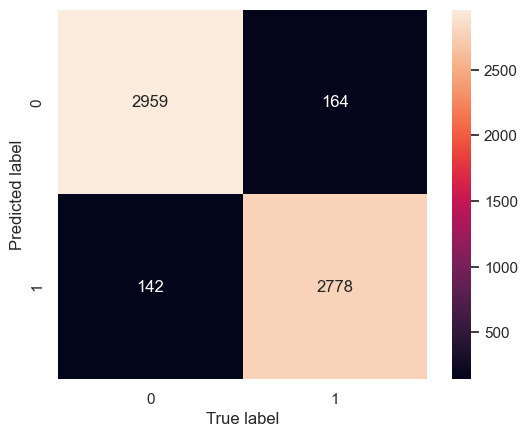

Accuracy:	0.949363
F1-score:	0.949317
Precision:	0.949428
Recall:		0.949232

Classification performance:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95      3101
           1       0.95      0.94      0.95      2942

    accuracy                           0.95      6043
   macro avg       0.95      0.95      0.95      6043
weighted avg       0.95      0.95      0.95      6043



In [42]:
test_data_lstm = pd.read_csv('test_data.csv')

test_text = test_data_lstm['alltext'].tolist()


def model_lstm_pre(model_lstm, text):
    tokenised = [token.lower() for token in word_tokenize(text)]
    indexed = [TEXT.vocab.stoi[token] for token in tokenised]
    length = [len(indexed)]
    tensor = torch.LongTensor(indexed).to(device)
    tensor = tensor.unsqueeze(1).T
    length_tensor = torch.LongTensor(length)
    prediction = model_lstm(tensor, length_tensor)

    pred_label = int(round(prediction.item()))
    return pred_label

labels_true = test_data_lstm['label'].tolist()

pred_label = []
for i in test_text:
    predicted_labels = model_lstm_pre(model_lstm, i)
    pred_label.append(predicted_labels)

mat = confusion_matrix(labels_true, pred_label)
sns.heatmap(mat.T, square=True, annot=True, fmt='d')
plt.xlabel("True label")
plt.ylabel("Predicted label")
plt.show()

# Compute and print classification performance metrics
print(f"Accuracy:\t{accuracy_score(labels_true, pred_label):f}")
print(f"F1-score:\t{f1_score(labels_true, pred_label, average='macro'):f}")
print(f"Precision:\t{precision_score(labels_true, pred_label,average='macro'):f}")
print(f"Recall:\t\t{recall_score(labels_true, pred_label,average='macro'):f}")

print(f'\nClassification performance:\n{classification_report(labels_true, pred_label)}')

## 7. a predict-function

In [43]:
def predict_reliability(text, model):
    
    label_names = {0: "Reliable",1:"Unreliable"}
    if model in ['model_bayes_fakenews', 'model_3nn_fakenews', 'model_7nn_fakenews']:
        with open(f"{model}.pkl","rb") as file:
            pickle_model = pickle.load(file)
        
        tokenised = [text]
        predicted_categories = pickle_model.predict(tokenised)
        # return predicted_categories

        pred_label = label_names[int(round(predicted_categories.item()))]

        return pred_label

    elif model in ['model_cnn_fakenews']:
        model_cnn = TextCNN(len(TEXT.vocab), 20, 10, [3,4,5], 1, 0.2)
        model_cnn.load_state_dict(torch.load(f'{model}.pt'))
        tokenised = [token for token in word_tokenize(text)]
        indexed = [TEXT.vocab.stoi[token] for token in tokenised]
        length = [len(indexed)]
        tensor = torch.LongTensor(indexed).to(device)
        tensor = tensor.unsqueeze(1).T
        length_tensor = torch.LongTensor(length)

        

        with torch.no_grad():
            output = model_cnn(tensor)
            prediction = torch.sigmoid(output).item()
        
        pred_label = label_names[int(round(prediction))]

        return pred_label
    
    elif model in ['model_lstm_fakenews']:
            
        model_lstm = FakeNewsNet(len(TEXT.vocab), 20, 16, 1, 2,True, 0.2)
        model_lstm.load_state_dict(torch.load(f'{model}.pt'))
        model_lstm.eval()

        tokenised = [token.lower() for token in word_tokenize(text)]
        indexed = [TEXT.vocab.stoi[token] for token in tokenised]
        length = [len(indexed)]
        tensor = torch.LongTensor(indexed).to(device)
        tensor = tensor.unsqueeze(1).T
        length_tensor = torch.LongTensor(length)
        prediction = model_lstm(tensor, length_tensor)

        pred_label = label_names[int(round(prediction.item()))]

        return pred_label
    
    else:
        return ('Please enter the correct model name')
    

In [44]:
# text = input("Please enter the news to be classified here:")
# model = input("Please enter the model name here:")

# We can ask the users to enter the news and the model, we just enter the string here for test
text = "Marcus Rashford was on target again as Manchester United cruised into the quarter-finals of the Europa League with a clinical win at Real Betis After an open first half Rashford put United ahead in the 55th minute with a thunderous long-range effort dipping into the bottom corner"
model = 'model_lstm_fakenews'
predict_reliability(text, model)

'Unreliable'

In [45]:
text = "Marcus Rashford was on target again as Manchester United cruised into the quarter-finals of the Europa League with a clinical win at Real Betis After an open first half Rashford put United ahead in the 55th minute with a thunderous long-range effort dipping into the bottom corner"
model = 'model_cnn_fakenews'
predict_reliability(text, model)

'Unreliable'

In [46]:
text = "Marcus Rashford was on target again as Manchester United cruised into the quarter-finals of the Europa League with a clinical win at Real Betis After an open first half Rashford put United ahead in the 55th minute with a thunderous long-range effort dipping into the bottom corner"
model = 'model_7nn_fakenews'
predict_reliability(text, model)

'Unreliable'

In [47]:
text = "Marcus Rashford was on target again as Manchester United cruised into the quarter-finals of the Europa League with a clinical win at Real Betis After an open first half Rashford put United ahead in the 55th minute with a thunderous long-range effort dipping into the bottom corner"
model = 'model_3nn_fakenews'
predict_reliability(text, model)

'Unreliable'

In [48]:
text = "Marcus Rashford was on target again as Manchester United cruised into the quarter-finals of the Europa League with a clinical win at Real Betis After an open first half Rashford put United ahead in the 55th minute with a thunderous long-range effort dipping into the bottom corner"
model = 'model_bayes_fakenews'
predict_reliability(text, model)

'Reliable'